# Kriptovalute

Kriptovalute su digitalne imovine prvotno osmišljene kao sredstvo za razmjenu vrijednosti koje koriste kriptografiju za validaciju i sigurnost transakcija, te kontrolu stvaranja dodatnih jedinica.
Kriptovalute koriste decentraliziranu kontrolu za razliku od centraliziranih bankarskih sustava.

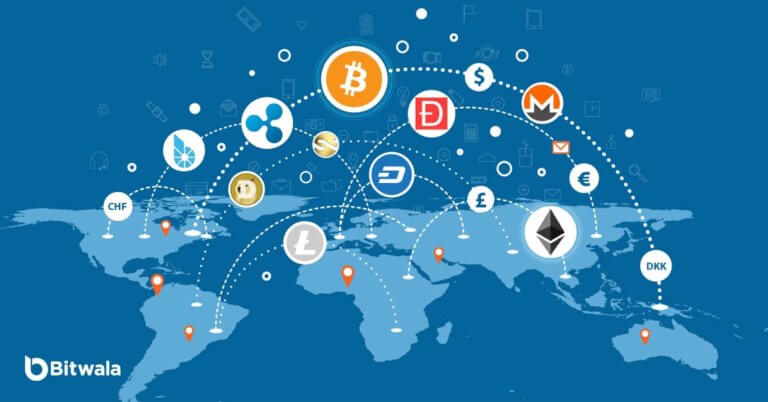

In [1]:
from IPython.display import Image 
Image(filename='Cryptocurrency.jpeg')

## Bitcoin

Bitcoin je prva decentralizirana kriptovaluta napravljena 2009. godine od čovjeka(ili ljudi) pod pseudonimom Satoshi Nakamoto. Motiv za projektiranje Bitcoina je bilo veliko nezadovoljstvo centraliziranim sustavom kojim su upravljale države i banke. 
Za Satoshija Nakamota problem bankarskog sustava je bilo povjerenje trećoj strani, tj. samoj banci preko kojih se svaka transakcija odvijala. Ono što je po njemu(njima) bilo potrebno je elektronički platni sustav baziran na kriptografijskom dokazu a ne na povjerenju trećoj strani, koji bi omogućavao dvjema stranama da razmjene sredstva direktno jedan s drugim bez povjeravanja trećoj strani. Problem je rješen takozvanom javnom knjigom u kojoj su zapisane sve transakcije javno, a sami računi i količina novca na njima je postala anonimna. Javnu knjigu sadrži svaki čvor koji sudjeluje u mreži. Javna knjiga je zapravo niz blokova u kojima su zapisane transakcije koje su obavljane na mreži.

Od tada do danas napravljeno je mnoštvo kriptovaluta koje se baziraju na raznim područjima primjene(od financija, preko osiguranja do nutricionizma).


## Blochchain

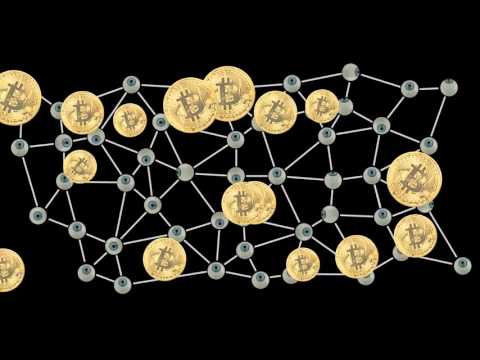

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("r43LhSUUGTQ")

Gotovo sve kriptovalute su napravljene na blockchain tehnologiji. Blockchain možemo poistovjetiti sa bazom podataka koja je podjeljena između svih čvorova koji sudjeluju u sustavu.
Osnovna građevna jedinica svakog blockchaina je blok.
Svaki blok sastoji se od svog zaglavlja i tijela. Zaglavlje sadrži hash prethodnog bloka i hash trenutnog bloka, dok tijelo sadrži podatake koji su spremljeni u bloku(data).

In [3]:
import hashlib

class Block:

    def __init__(self, previousHash, data):
        
        self.data = data
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = self.hashBlock().hexdigest()
        
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        se = (str(self.data) + str(self.previousHash)).encode('utf-8')
        sha.update(se)
        return sha

U naš primitivni blok možemo zapisati bilo kakav podatak od teksta do slika i videa.

In [4]:
firstBlock = Block("","Ovdje moze biti bilo koji podatak")#Tekst spremljen u prvom bloku
firstBlock.hash
secondBlock = Block(firstBlock.hash,Image(filename='Cryptocurrency.jpeg'))
secondBlock.hash
firstBlock.hash

'6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929'

### Hash

Hash funkcija je algoritam koji od podatka proizvoljne veličine(može biti slovo, a može biti i tekst cijele Biblije ili film od 2 sata) stvara podatak fiksne dužine. Hashiranje je deterministički određena funkcija gdje isti ulaz podataka uvijek daje istu izlaznu vrijednost. Najmanja izmjena podatka kojeg hashiramo rezultira totalno drugim outputom.
Linija iznad ispisuje jedinstveni 256-bitni output SHA-256 algoritma. Ako malo promjenimo ulazni string vijednost hash funkcije će biti totalno drugačija:

In [5]:
#Podaci su indentični samo je promjenjen prvi parametar umjesto zadnjeg znaka u hashu("9") stavljen je znak "8" 
secondBlockChanged = Block(firstBlock.hash[:-1]+"8",Image(filename='Cryptocurrency.jpeg'))
secondBlockChanged.hash

'8b6de1d6bab83c8eca4a1ab66fd04c74e72b9e06280726a4fd956da8e57b777f'

Što je toliko zanimljivo kod hash funkcije?

Odgovor leži u invertibilnosti hash funkcije. Što znači da je gotovo nemoguće rekonstruirati ulaznu vrijednost gledajući samo izlaznu vrijednost.
Također pomoću hash funkcije svaki blok ima svoju jedinstvenu "šifru" koja ovisi o šifri prethodnog bloka i podacima koji se nalaze u samom bloku.

Najjednostavnija moguća implementacija blockchaina je sljedeća:

In [6]:
class Blockchain:
    
    def __init__(self, genesisBlock):
        
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)

In [7]:
blockchain = Blockchain(firstBlock)
blockchain.addNewBlock(secondBlock)
thirdBlock = Block(secondBlock.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain.addNewBlock(thirdBlock)
print(blockchain.blocks[0].hash)
print(blockchain.blocks[1].hash)
print(blockchain.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
4c6e24b8ca1c6291594b66ca7635a2c96c964903c43eb28633edd74f297e40e4
2bc19177d9af20b7df48e629d6ff54937de2c58041ae4631e302a98173021d90


U liniji iznad imamo blockchain koji se sastoji od tri bloka koji su povezani tako da treći blok sadrži u svom zaglavlju hash drugoga a drugi u zaglavlju hash prvoga. Tako svaki blok može vidjeti što se nalazi u svim prethodnima ali on ne zna zablokove iza sebe. Ako promjenimo bilo što u podacima bilo kojega bloka njegov, a i svi hashovi blokova koji slijede bit će promjenjeni. Kreirat ćemo blockchain identičan prethodnom prvi i treći blok ostaju ne promjenjeni dok su u drugom bloku promjenjeni podaci.

In [8]:
blockchain1 = Blockchain(firstBlock)
secondBlockChangedTwice = Block(firstBlock.hash,"Promjenio sam drugi blok")
blockchain1.addNewBlock(secondBlockChangedTwice)
thirdBlock = Block(secondBlockChangedTwice.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain1.addNewBlock(thirdBlock)
print(blockchain1.blocks[0].hash)
print(blockchain1.blocks[1].hash)
print(blockchain1.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
b5a305ad60882dfa76b1a16b8bee56e6912b201f8b95776210547812db0dce79
e58da200b19e4e7f45a1f900c9989ca20fe473f1fb56b8f7dbb4c57a300ab5e7


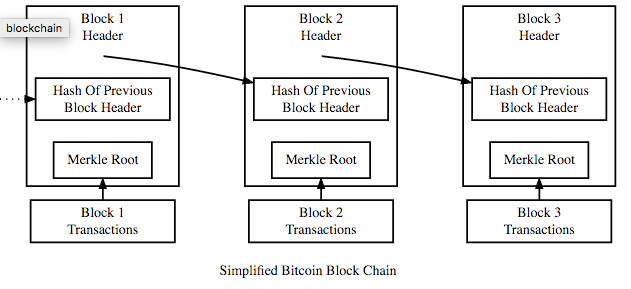

In [9]:
Image(filename='blockchain.png')


Da bi implementirali primitivnu kriptovalutu morat ćemo dodati još puno toga u svaki blok. Krenimo sa transakcijama. U svaki blok ćemo upisivati transakcije koje će biti javno dostupne svim čvorovima, tj. svatko tko sudjeluje u održavanju mreže vidi tko je kome poslao koju količinu coina.
Za početak implementirat ćemo transakciju:

In [10]:
class Transaction:
    
    def __init__(self, sender, reciever, amount,fee):
        
        self.sender = sender
        self.reciever = reciever
        self.amount = amount
        self.fee = fee
        self.encoded = (str(self.sender) + str(self.reciever) + 
                str(self.amount) ).encode('utf-8')
        self.hash = self.hashTransaction().hexdigest()
        
        
    def hashTransaction(self):
        
        sha = hashlib.sha256()
        sha.update(self.encoded)
        return sha
    
    def returnTransaction(self):
        
        return (str(self.sender)+" "+ str(self.reciever)+" "
              +str(self.amount)+" "+str(self.fee))

Čvorovi koji sudjeluju u održavanju mreže zovu se rudari(miners). Kada korisnik mreže odluči poslati određenu količinu coina nekom drugom korisniku on ponudi određenu naknadu rudaru koji uvrsti njegovu transakciju u svoj blok. Normalno što je veća naknada ponuđena to je veća vjerojatnost da će njegova transakcija biti prihvaćena prije. Sve transakcije koje su predložene ali nisu prihvaćene(zapisane u blockchain) idu u bazen nepotvrđenih transakcija(mempool):

In [11]:
import random
class Mempool:
    
    def __init__(self):
        
        self.transactions=[]
        
    def addNewTransaction(self,transaction):
        
        self.transactions.append(transaction)
        self.transactions = sorted(self.transactions, key=lambda trans: trans.fee)
    
    def getSizeOfMempool(self):
        return len(self.transactions)
    
    def printMempool(self):
        
        for trans in self.transactions:
            print(trans.returnTransaction())
    
    def generateRandom(self,n,accounts):
        
        for i in range(n):
   
            sender = random.choice(accounts)
            reciever = random.choice(accounts)
            while (sender == reciever):
                reciever = random.choice(accounts)
    
            amount = random.randint(1,100)
            fee = random.randint(1,100) / 100
            transaction = Transaction(sender,reciever,amount,fee)
            self.addNewTransaction(transaction)


Radi jednostavnosti račune ćemo identificirati imenima, a ne hashevima kako to inače biva radi anonimnosti.

In [12]:
accounts =['Alice','Bob','Mary','Peter','John']
simulationMempool = Mempool()
transactions = []

for i in range(100):
   
    sender = random.choice(accounts)
    reciever = random.choice(accounts)
    while (sender == reciever):
        reciever = random.choice(accounts)
    
    amount = random.randint(1,100)
    fee = random.randint(1,100) / 100
    transaction = Transaction(sender,reciever,amount,fee)
    simulationMempool.addNewTransaction(transaction)
simulationMempool.printMempool()

John Peter 72 0.01
Alice John 71 0.01
Mary Peter 25 0.02
John Bob 20 0.02
John Alice 98 0.03
Peter Alice 61 0.03
Bob Mary 73 0.05
Alice Mary 23 0.07
Alice John 84 0.09
Mary Peter 95 0.11
Mary John 10 0.12
Bob John 72 0.12
Peter John 61 0.12
Alice Bob 57 0.12
Alice John 56 0.13
Mary Peter 36 0.13
Mary John 36 0.14
Mary Alice 23 0.14
John Alice 18 0.14
Mary Bob 98 0.16
Bob Mary 25 0.17
Mary Alice 1 0.18
Bob Alice 94 0.2
Alice Mary 67 0.21
Bob Mary 27 0.22
Alice John 8 0.22
Alice John 46 0.24
Mary Alice 93 0.24
Peter Bob 35 0.25
John Bob 80 0.28
Mary Bob 18 0.28
John Bob 78 0.29
Mary Bob 68 0.3
Peter John 13 0.3
Bob John 87 0.31
Mary Bob 17 0.31
Mary Bob 87 0.32
Mary Alice 53 0.33
Peter Mary 46 0.34
Mary Bob 96 0.34
Bob John 58 0.36
Peter Mary 14 0.36
Bob Peter 78 0.37
Peter John 77 0.38
Mary Alice 14 0.39
Alice Peter 35 0.39
Alice Mary 47 0.4
John Alice 12 0.43
Peter Alice 78 0.43
Peter John 25 0.44
Alice Mary 29 0.44
Bob Mary 34 0.45
John Mary 25 0.46
Alice John 88 0.46
Bob John 51 0.46

Generirali smo mempool sa slučajnim transakcijama, što će nam poslužiti za simulaciju. U praksi mempool je dimičan, tj. svakog trena bilo koji čvor može ubaciti transakciju neovisno o tome jeli ju teoretski moguće izvršiti(tj. ima li korisnik coina koliko šalje).

### Privatni i javni ključevi

Da bi se korisnik uključio u mrežu, za to mu je potrebna šifra. Da bi svakome korisniku pridružili jedinstvenu šifru koristi se kriptografija s javnim ključem, tj. šifriranje i dešifriranje koriste različite ključeve. Javni ključ će biti javno dostupan svim korisnicima, dok je privatni ključ jedinstveni indetifikator svakoga računa. Uistinu je nemoguće izvesti privatni ključ iz javnog ključa.
Privatni i javni ključ služe za slanje transakcija, za validaciju transakcija te za validaciju blokova.

#### RSA

RSA je prvi i najpopularniji kriptosustav s javnim ključem . Njegova sigurnost ima temelje na težini faktorizacije velikih prirodnih brojeva.

In [13]:
from Crypto.PublicKey import RSA 
    
class Wallet:
    
    def __init__(self,name):
        
        self.name = name
        self.key = RSA.generate(2048, e=65537)
        self.public_key = self.key.publickey().exportKey("PEM") 
        self.private_key = self.key.exportKey("PEM") 
        self.listOfTransaction = []

In [14]:
wallet1 = Wallet("Alice")
wallet2 = Wallet("Bob")

message="Kako si Alice?".encode()
crypto = wallet1.key.encrypt(message,32)
decryptedMessage =wallet1.key.decrypt(crypto)
print (crypto)
print("\n"+str(decryptedMessage))

(b'\x0bi\xa83\xfdp\xba\x88\xaa\x9aX\x19S\xfct6\xc17y\r\xf5\xf1\xbb\xeb\x87\xce\xd9]\xc6\x9b\xd2\xb9\x9f\x106\xc5\xeb\xb7+!-3Fm\x9b~\xb4\x9dYD\xc6\xf2w\x9a{\xb1\xf9\t\xa1s\x08h\xdd\xb1\xd1\xf2\xb9\xaf\xb0\x1f\xef\x14mt\xcc\x84\x9b\xa4*\xc8Ar^\xc2H\xbc\xf3]\x19\x19\x83\tcg\xc0"?S\xb7%\x14\x89\x8c!\xbawwS\xb4\xdb\xf9\xbcN|:\x88 6\x92\xd6\x9e\xed^f\x1d[\xd6\xbf\x90jK0\xa8\xe99\x9b\x107\x1a<\xd4yo\xac\x99\xc4q\xb25\xca21\x06\xe7\xe0H\xe1\x8f\xe9\x0f\xa3\xcf\xee\xde\x190k2w\x18k\xc2\xaa\x02\xc5j\x0f>{%\x0e\xccca\x7f\xe3\xb8\x83\xd8|\x99M\xd9\xe0\xf3\x0brg\xa0Z\xd6\xf9\xf7l\xf2\xd5\x0f~\x94\xcf~\xdcZ\xd6j\\\xa4e\xbc\xd4\x11~\x03\xd6q\xd8e\x8b\x81\xd7,\xcb\xb0\x1c&H/\x98\x01C\x06\xb9\xc4`\xfc\x19+Pw\xf4)\xc7\x1fL]"',)

b'Kako si Alice?'


Wallet služi za čuvanje transackija koje je poslao ili primio određeni korisnik, a ne stanje računa. 
Npr. ako je korisnik dobio tri transakcije od po 3, 0.01 i 0.2 coina što znači da je stanje njegovog računa 3.21 coina. Sada ako korisnik odluči poslati 0.15 coina što očito može jer još više ima na računu, neće se njegovo stanje umanjiti za 0.15 coina nego wallet otključava output od 0.2 coina te cijeli iznos (od 0.2 coina) prosljeđuje kao input novoj transakciji, koja ima dva outputa, jedan je 0.15 coina poslanih na adresu primatelja dok je drugi na njegovu osobnu adresu. 

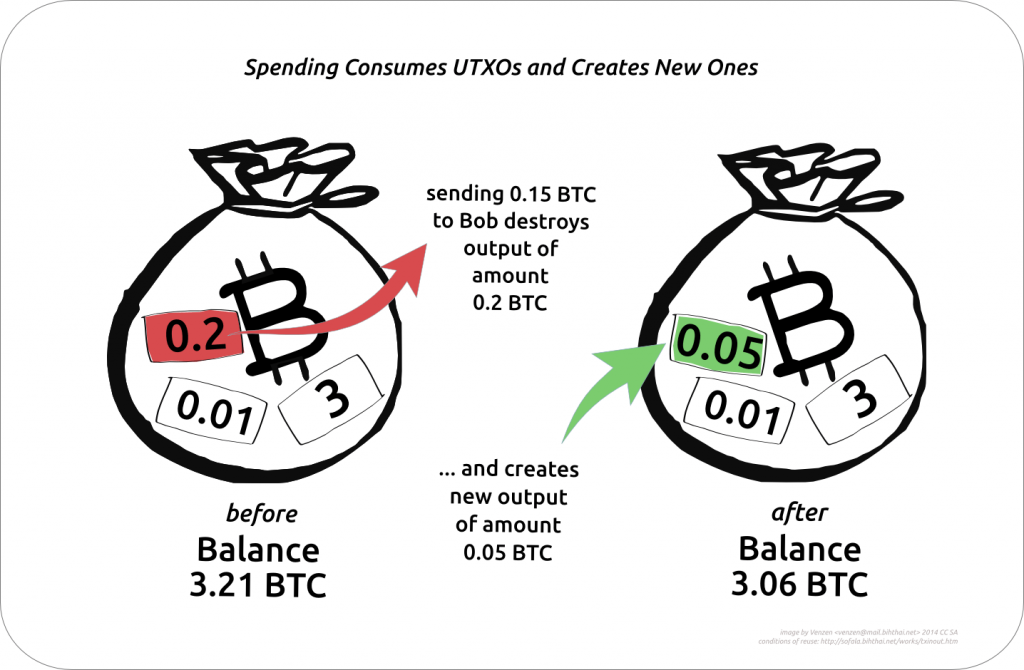

In [15]:
Image(filename='transaction.png')

Radi jednostavnosti implementacije nećemo koristiti javne i privatne ključeve. Račun je jednistveno određen svojim imenom(name).

In [16]:
import datetime as date

def getMeTime():
    
    return date.datetime.now()

Implementirati ćemo napredni blok u odnosu na prethodni, koji umjesto data sadrži listu transakcija, dodali smo index i timespamp. Timestamp je vrijeme kada je blok minean(izrudaren), a indexom određijemo koji je to blok po redu.
Dodatno novi blok sadrži i nounce, to je broj kojeg mineri pogađaju kako bi zadovoljili uvijet kako hash mora izgledati da bi blok bio uvršten u blockchain.
Dodana je metoda mineBlock koju koriste mineri kako bi našli hash bloka koji počinje sa određenim brojem nula. Razlog takvog uvjeta na hash je povećana težina mineanja bloka. Povećavanjem broja početnih nula potrebna je veća procesorska snaga za mineanje istog bloka. To je uvedeno da statistički vrijeme mineanja novog bloka bude u prosjeku fiksno neovisno o tome koliko se ukupna procesorska snaga mreže poveća.

In [17]:
import hashlib

class BlockAdvanced:

    def __init__(self, index, timpestamp, previousHash, transactions):
        
        self.index = index
        self.timestamp = timpestamp
        self.nounce = 0
        self.transactions = transactions
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = ""
        self.dificulty = "0"*4+"F"*60
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        self.encoded = (str(self.index) + str(self.timestamp) + str(self.nounce)+
                str(self.transactions) + str(self.previousHash)).encode('utf-8')
        sha.update(self.encoded)
        return sha
    
    def mineBlock(self):
        
        while(not self.hashBlock().hexdigest()<self.dificulty):
            self.nounce +=1
        self.hash = self.hashBlock().hexdigest()        

### Rudari

Rudari(Mineri) su čvorovi koji imaju kod sebe cijeli blockchain (povijest transakcija), te iz mempoola uzimaju transakcije provjeravaju njuhovu validnost te ih uvrštavaju u novi blok ako su validne. Tako se natječu za nagradu koja se daje rudaru koji prvi izrudati novi blok.

In [18]:
class BlockchainAdvanced:
    
    def __init__(self, genesisBlock):
        
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)
    
    def getSize(self):
        return len(self.blocks)

In [19]:
class Miner:
    
    def __init__(self, name, blockchain ,mempool, difficulty, maxTransactionsPerBlock):
        
        self.name = name
        self.blockchain = blockchain
        self.mempool = mempool
        self.difficulty = "0"*difficulty+"F"*(60-difficulty)
        self.maxTransactionsPerBlock = maxTransactionsPerBlock
        self.sizeOfMempool = self.mempool.getSizeOfMempool()
        self.blockchainSize = 1
        self.block = type('BlockAdvanced')
        self.cnt=1

    
    def mine(self):
        
        if(self.sizeOfMempool == 0):
            return 0
        transactions = []

        beg=True
        while(len(transactions) < self.maxTransactionsPerBlock  and (self.sizeOfMempool-1) >= 0):
            #if (beg):
            #    trans1 = Transaction("-",)
            if(self.transactionValid(  self.mempool.transactions[self.sizeOfMempool-1], transactions )):
                transactions.append(self.mempool.transactions[self.sizeOfMempool-1])
            self.mempool.transactions.remove(self.mempool.transactions[self.sizeOfMempool-1])
            self.sizeOfMempool = self.mempool.getSizeOfMempool()
                
            #self.sizeOfMempool -=1
            
        #self.mempool.printMempool()
        self.block = BlockAdvanced(self.blockchain.getSize(),getMeTime(),
                              self.blockchain.blocks[self.blockchain.getSize()-1].hash,
                                   transactions)
        self.blockchain.addNewBlock(self.block)
        self.blockchainSize +=1
        self.block.mineBlock()
        
        return self.block
    
    def transactionValid(self, trans,_transactions):
        
        sender = trans.sender
        amount = trans.amount
        balance = 0
        
        for block in self.blockchain.blocks:
            #printBlock(block)
            
            for tran in block.transactions:
                
                #print(tran.returnTransaction())
                if(tran.sender == sender):
                    balance -=tran.amount
                elif(tran.reciever == sender):
                    balance +=tran.amount
        
        for trans in _transactions:
            
            if(tran.sender == sender):
                balance -=tran.amount
                #print(sender+str(amount))
            elif(tran.reciever == sender):
                balance +=tran.amount
                #print(sender+str(amount))
            
                   
        if((balance-amount)>=0):
            return True
        
        else: return False
        
        
        

In [20]:
def printBlock(block):
    
    print("=" * 31 + " " + str(block.index) + " " + "=" * 30)
    print(str(block.hash))
    print("Prev. Hash:")
    print(str(block.previousHash))
    print(str(block.timestamp)+ "   Nounce: "+str(block.nounce))
    print("=" * 64)
    for trans in block.transactions:
        print(trans.returnTransaction())
    print("\n")
def printBlockchain(blockchain):
    
    for block in blockchain.blocks:
        printBlock(block)

In [21]:
genesisTrans =[]
for account in accounts:
    trans = Transaction("-",account,1000,0)
    #trans.returnTransaction()
    genesisTrans.append(trans)

## Simulacija

In [22]:
genesisTrans =[]
for account in accounts:
    trans = Transaction("-",account,100,0)
    #trans.returnTransaction()
    genesisTrans.append(trans)

genesisBlock = BlockAdvanced(0, getMeTime(),"",genesisTrans) 
genesisBlock.mineBlock() # izruderen prvi blok

simulationBlockchain = BlockchainAdvanced(genesisBlock)
simulationBlockchain = BlockchainAdvanced(genesisBlock)
accounts =['Alice','Bob','Mary','Peter','John']
simulationMempool = Mempool()
simulationMempool.generateRandom(100,accounts)
simulationMempool.printMempool()

Mary John 31 0.01
Mary Peter 41 0.02
John Alice 66 0.02
John Bob 37 0.04
John Mary 32 0.05
John Mary 65 0.09
Alice Peter 49 0.1
Bob Peter 29 0.1
Peter John 87 0.11
Mary Alice 81 0.12
John Mary 27 0.13
John Peter 23 0.16
Bob John 24 0.16
Bob Alice 65 0.17
John Bob 72 0.18
Alice Bob 7 0.18
Mary Peter 55 0.18
John Mary 4 0.18
Mary Peter 80 0.19
Peter John 8 0.2
John Alice 85 0.21
Alice John 74 0.21
Bob Alice 22 0.22
Bob Peter 48 0.24
John Peter 59 0.24
Mary Alice 83 0.25
Bob Peter 13 0.26
John Bob 6 0.26
John Peter 49 0.28
Alice John 18 0.3
Bob John 85 0.3
Mary John 76 0.32
Alice John 10 0.33
Bob John 32 0.33
Alice Mary 83 0.33
Alice John 29 0.35
John Alice 39 0.36
Mary Alice 54 0.36
Mary Peter 12 0.37
Mary Alice 92 0.37
Mary Bob 82 0.38
Mary Alice 52 0.38
Alice Bob 13 0.39
Bob Peter 89 0.39
Peter Mary 30 0.4
Peter Alice 8 0.41
John Mary 31 0.41
Peter John 77 0.44
Mary John 93 0.45
Mary Peter 29 0.47
Peter John 60 0.47
Mary Peter 41 0.5
Mary Bob 1 0.52
Alice Bob 22 0.53
John Peter 39 0.53

In [23]:
minerAlice = Miner("Alice",simulationBlockchain,simulationMempool,5,6)


new_block = minerAlice.mine()

for i in range(0,minerAlice.mempool.getSizeOfMempool()):
    new_block = minerAlice.mine()

    
printBlockchain(simulationBlockchain)

=============================== 0 ==============================
00009f70247ebd4b91519041751725811149fc864aa66b271c3f61ef91880422
Prev. Hash:

2018-04-15 22:52:05.797398   Nounce: 31832
- Alice 100 0
- Bob 100 0
- Mary 100 0
- Peter 100 0
- John 100 0


=============================== 1 ==============================
0000665f2de712270629e4d23e4ed6d42464d69c8df0cefb89cb1640ca23c537
Prev. Hash:
00009f70247ebd4b91519041751725811149fc864aa66b271c3f61ef91880422
2018-04-15 22:52:06.839364   Nounce: 57988
Alice Mary 48 0.99
Peter Mary 88 0.98
John Peter 96 0.95
John Mary 63 0.94
John Mary 77 0.92
John Mary 88 0.92


=============================== 2 ==============================
000082faa3a2612868fea6e838429d69a6b37aabb4d4f4b7306f4ad9903bf691
Prev. Hash:
0000665f2de712270629e4d23e4ed6d42464d69c8df0cefb89cb1640ca23c537
2018-04-15 22:52:07.274517   Nounce: 37776
Bob Peter 80 0.92
Peter Mary 4 0.89
Alice Bob 2 0.88
Alice John 51 0.81
Alice Bob 36 0.8
Mary Peter 24 0.8


========================

Gornja implementacija primitivne kriptovalute je nepotpuna. Postoji samo jedan rudar, ako ih inicijaliziramo više oni neće moći surađivati, tj. svaki će graditi svoj blockchain. Također mempool je statičan i transakcije može generirati bilo tko, što je inače okraničeno samo na korisnika koji ima privatni ključ računa.

In [24]:
from multiprocessing import Process
   
dificulty = "0"*5+"F"*60
timestamp1 = getMeTime()

prevHash=genesisBlock.hash
index=1
parallelMempool = Mempool()
parallelMempool.generateRandom(5,accounts)
transactions = parallelMempool.transactions
timestamp2 = getMeTime()
nounce1=0
nounce2=0

def hashBlock(index,timestamp,previousHash,transactions,nounce):
        
    sha = hashlib.sha256()
    encoded = (str(index) + str(timestamp) + str(nounce)+
            str(transactions) + 
               str(previousHash)).encode('utf-8')
    sha.update(encoded)
    return sha

def mineBlock1(index,timestamp,previousHash,transactions):
   
    nounce1=0
    while(not hashBlock(index,timestamp,previousHash,transactions,nounce1).hexdigest()<dificulty):
        nounce1 +=1
        pass
    hashh = hashBlock(index,timestamp,previousHash,transactions,nounce1).hexdigest()
    print ("Block1 mined! hash:"+hashh)
    
def mineBlock2(index,timestamp,previousHash,transactions):

    nounce2=0
    while(not hashBlock(index,timestamp,previousHash,transactions,nounce2).hexdigest()<dificulty):
        nounce2 +=1
        pass
    hashh = hashBlock(index,timestamp,previousHash,transactions,nounce2).hexdigest()
    print ("Block2 mined! hash:"+hashh)
    
p1=Process(target=mineBlock2(index,timestamp1,prevHash,transactions))
p1.start()
p2 = Process(target=mineBlock1(index,timestamp2,prevHash,transactions))
p2.start()
p1.join()
p2.join()

Block2 mined! hash:0000061fc054e0d43ca176cf57c9b89f2526ad02080e3fe00797635803dbb7fa
Block1 mined! hash:000004ab7293109c3b42c3f8c94bdecd3522e225f9070b69e21fc13b0ccf0e55


In [25]:
import pandas as pd
bitcoin = pd.read_csv('data/bitcoin_price.csv')

In [26]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
5,"Feb 15, 2018",9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
6,"Feb 14, 2018",8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
7,"Feb 13, 2018",8926.72,8958.47,8455.41,8598.31,"5,696,720,000","150,516,000,000"
8,"Feb 12, 2018",8141.43,8985.92,8141.43,8926.57,"6,256,440,000","137,258,000,000"
9,"Feb 11, 2018",8616.13,8616.13,7931.10,8129.97,"6,122,190,000","145,245,000,000"


In [27]:
import numpy as np

In [28]:
from datetime import date, timedelta

def getDates(lista, d1,d2):
    #d1 = date(2013, 4, 28)  # start date
    #d2 = date(2018, 2, 20)  # end date

    delta = d2 - d1         # timedelta
    for i in range(delta.days + 1):
        lista.append(d2 - timedelta(days=i))
btcLis=[]

getDates(btcLis,date(2013, 4, 28),date(2018, 2, 20))

## Graf cijene Bitcoina

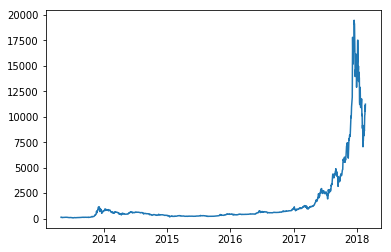

In [29]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(btcLis,bitcoin.Open.values)

In [31]:
pozitivniDani = bitcoin.Open.values-bitcoin.Close.values

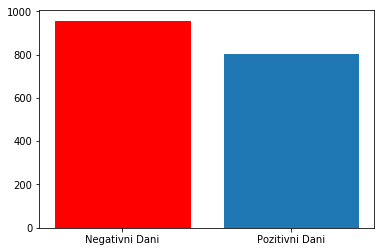

In [33]:
from matplotlib.ticker import FuncFormatter

x = np.arange(2)
brojDana = [(pozitivniDani>=0).sum(), (pozitivniDani<0).sum()]
barlist=plt.bar(['Pozitivni Dani', 'Negativni Dani'], brojDana)
barlist[1].set_color('r')
plt.show()

In [38]:
import calendar

stat=[]
dayOfWeek =[]
for it,item in enumerate(btcLis):
    #print(item)
    poz=0
    #dayOfWeek.append(calendar.day_name[item.weekday()])
    if(pozitivniDani[it]>0): poz=1
    stat.append((calendar.day_name[item.weekday()],poz))
stat

[('Tuesday', 0),
 ('Monday', 0),
 ('Sunday', 1),
 ('Saturday', 0),
 ('Friday', 0),
 ('Thursday', 0),
 ('Wednesday', 0),
 ('Tuesday', 1),
 ('Monday', 0),
 ('Sunday', 1),
 ('Saturday', 1),
 ('Friday', 0),
 ('Thursday', 0),
 ('Wednesday', 1),
 ('Tuesday', 0),
 ('Monday', 1),
 ('Sunday', 1),
 ('Saturday', 0),
 ('Friday', 1),
 ('Thursday', 1),
 ('Wednesday', 0),
 ('Tuesday', 1),
 ('Monday', 1),
 ('Sunday', 0),
 ('Saturday', 0),
 ('Friday', 1),
 ('Thursday', 1),
 ('Wednesday', 0),
 ('Tuesday', 1),
 ('Monday', 1),
 ('Sunday', 1),
 ('Saturday', 0),
 ('Friday', 0),
 ('Thursday', 0),
 ('Wednesday', 1),
 ('Tuesday', 1),
 ('Monday', 0),
 ('Sunday', 1),
 ('Saturday', 0),
 ('Friday', 0),
 ('Thursday', 1),
 ('Wednesday', 0),
 ('Tuesday', 1),
 ('Monday', 1),
 ('Sunday', 1),
 ('Saturday', 0),
 ('Friday', 0),
 ('Thursday', 0),
 ('Wednesday', 0),
 ('Tuesday', 0),
 ('Monday', 1),
 ('Sunday', 0),
 ('Saturday', 1),
 ('Friday', 1),
 ('Thursday', 1),
 ('Wednesday', 1),
 ('Tuesday', 0),
 ('Monday', 0),
 ('Sund

In [45]:
s = pd.Series(dayOfWeek)
s
dayInWeek=[
 'Sunday',
 'Saturday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Tuesday',
 'Monday',]
cnt= np.zeros(7)
positive=dict(zip(dayInWeek,cnt))
negative=dict(zip(dayInWeek,cnt))
        
for s in stat:
    if(s[1]>0):
        positive[s[0]] +=1
    else:
        negative[s[0]] +=1
        
negativList=[]
positLis = []
for i in dayInWeek:
    negativList.append(positive[i])
    positLis.append(negative[i])
pos = pd.DataFrame(negativList,columns=['Positive days'],index=dayInWeek)
sor=pos.sort_values(by='Positive days')
sor


,Positive days
Monday,107.0
Friday,108.0
Saturday,109.0
Tuesday,112.0
Thursday,115.0
Wednesday,124.0
Sunday,126.0


In [46]:
neg = pd.DataFrame(positLis,columns=['Negative days'],index=dayInWeek)
neg
sorNeg=neg.sort_values(by='Negative days')
sorNeg

,Negative days
Sunday,126.0
Wednesday,127.0
Thursday,136.0
Tuesday,140.0
Saturday,142.0
Friday,143.0
Monday,145.0


Najveće cijene bitcoina su ponedjeljkom dok su nedjeljom najmanje.

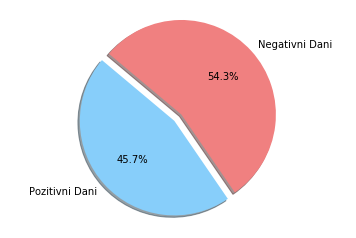

In [47]:
# Data to plot
labels = 'Pozitivni Dani', 'Negativni Dani'
sizes = [(pozitivniDani>=0).sum(), (pozitivniDani<0).sum()]
colors = ['lightskyblue',  'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Graf volatilnosti - razlika izmeđuu otvarajuće i zatvarajuće cijene Bitcoina

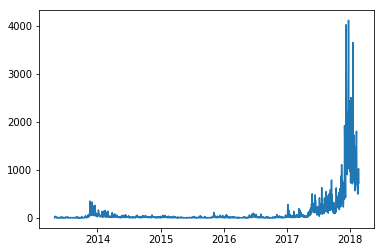

In [48]:
#%matplotlib inline 
volatilnost = bitcoin.High.values-bitcoin.Low.values
plt.plot(btcLis,volatilnost)

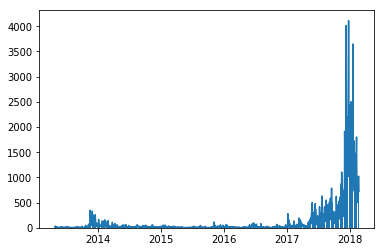

In [50]:
volatilnost = bitcoin.High.values-bitcoin.Low.values
volatilnost
plt.plot(btcLis,volatilnost)


x = np.arange(len(volatilnost))
barlist=plt.bar(dates2, volatilnost)

plt.show()

Analiza koreliranosti cijena kriptovaluta

In [54]:
ethereum = pd.read_csv('data/ethereum_price.csv')
ethLis=[]
         
getDates(ethLis,date(2015, 8, 7),date(2018, 2, 20))

ripple = pd.read_csv('data/ripple_price.csv')
ripLis=[]
         
getDates(ripLis,date(2013, 8, 4),date(2018, 2, 20))

Text(0.5,1,'Ripple')

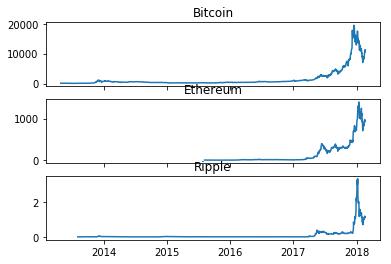

In [56]:
fig3, (lijevi, srednji, desni) = plt.subplots(3, 1 , sharex=True)
x2 = np.linspace(0, 2)
lijevi.plot(btcLis,bitcoin.Open.values)
lijevi.set_title('Bitcoin')
srednji.plot(ethLis,ethereum.Open.values)
srednji.set_title('Ethereum')
desni.plot(ripLis,ripple.Open.values)
desni.set_title('Ripple')


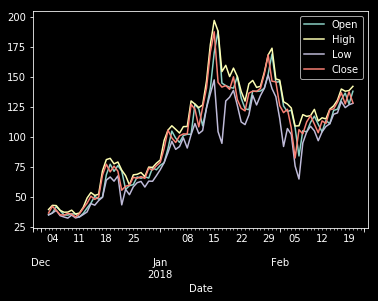

In [79]:
fixed_df = pd.read_csv('data/neo_price.csv', sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

with plt.style.context(('dark_background')):
    fixed_df[:80].plot()
plt.show()

In [75]:
import re
match = re.search(r'(\d-\d-\d)', bitcoin.Date.values[0])
re.split(r'-',bitcoin.Date.values[0])



['Feb 20, 2018']